<a href="https://colab.research.google.com/github/gustavoramos82/visualiza-o-prouni-2017/blob/main/Eda_Prouni_sec%C3%A7%C3%A3o_idade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Secção de Idade

Neste notebook será feito a análise por idade, e compara ve se os resultados são diferentes se cosiderarmos com a análise macro

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
prouni = pd.read_csv('/content/drive/MyDrive/Datasets/pda-prouni-2017.csv',sep=';')
prouni.drop(['CODIGO_EMEC_IES_BOLSA','CPF_BENEFICIARIO_BOLSA'],axis=1,
            inplace=True)
prouni['DT_NASCIMENTO_BENEFICIARIO'] = pd.to_datetime(prouni['DT_NASCIMENTO_BENEFICIARIO'],
                                                      format='%d/%m/%Y')
prouni['IDADE'] = 2017 - prouni['DT_NASCIMENTO_BENEFICIARIO'].dt.year
prouni.head()

,ANO_CONCESSAO_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,IDADE
0,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,F,Branca,1992-04-29,N,Sul,PR,SAO JOSE DOS PINHAIS,25
1,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1999-01-24,N,Sul,PR,TOLEDO,18
2,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1994-05-19,N,Sul,PR,CURITIBA,23
3,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1997-01-31,N,Sul,PR,TOLEDO,20
4,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1994-11-24,N,Sul,PR,CURITIBA,23


In [ ]:
prouni.describe()['IDADE']


count    236636.000000
mean         23.345666
std           6.592721
min          16.000000
25%          19.000000
50%          21.000000
75%          25.000000
max          78.000000
Name: IDADE, dtype: float64

Nesta parte da análise fiz a seguinte divisão
- até 20 anos;
- Mais de 20 até 50 anos;
- Mais de 50 anos.

In [ ]:
# Selecionar de Idade até 20 anos
prouni_20 = prouni[prouni['IDADE']<=20]
prouni_20.head()


,ANO_CONCESSAO_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,IDADE
1,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1999-01-24,N,Sul,PR,TOLEDO,18
3,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,M,Branca,1997-01-31,N,Sul,PR,TOLEDO,20
5,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Contábeis,Noturno,F,Branca,1998-03-27,N,Sul,PR,LONDRINA,19
6,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Ciências Sociais,Noturno,F,Branca,1999-09-06,N,Sul,PR,CURITIBA,18
7,2017,PONTIFÍCIA UNIVERSIDADE CATÓLICA DO PARANÁ,BOLSA PARCIAL 50%,Presencial,Comunicação Social,Matutino,F,Branca,1999-12-02,N,Sul,PR,CAMPO LARGO,18


In [ ]:
prouni_20['MODALIDADE_ENSINO_BOLSA'].value_counts()

Presencial    97337
EAD           11857
Name: MODALIDADE_ENSINO_BOLSA, dtype: int64

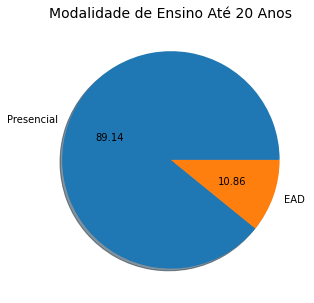

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Modalidade de Ensino Até 20 Anos',fontsize=14)
plt.pie(prouni_20['MODALIDADE_ENSINO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_20['MODALIDADE_ENSINO_BOLSA'].value_counts().index);

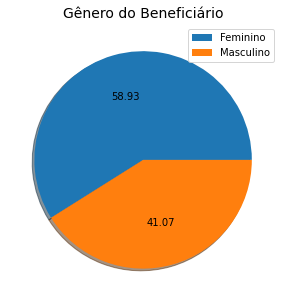

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Gênero do Beneficiário',fontsize=14)
plt.pie(prouni_20['SEXO_BENEFICIARIO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f')
plt.legend(['Feminino','Masculino']);

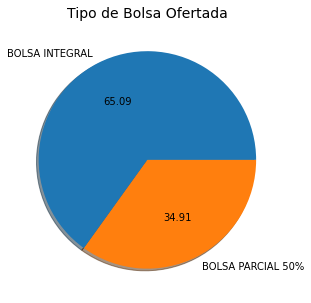

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Tipo de Bolsa Ofertada',fontsize=14)
plt.pie(prouni_20['TIPO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_20['TIPO_BOLSA'].value_counts().index);

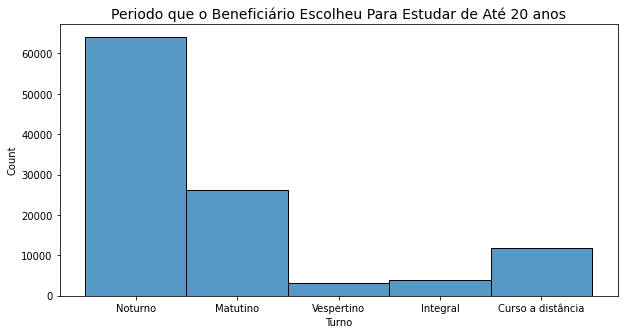

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Periodo que o Beneficiário Escolheu Para Estudar de Até 20 anos',fontsize=14)
sns.histplot(x='NOME_TURNO_CURSO_BOLSA',data=prouni_20)
plt.xlabel('Turno');

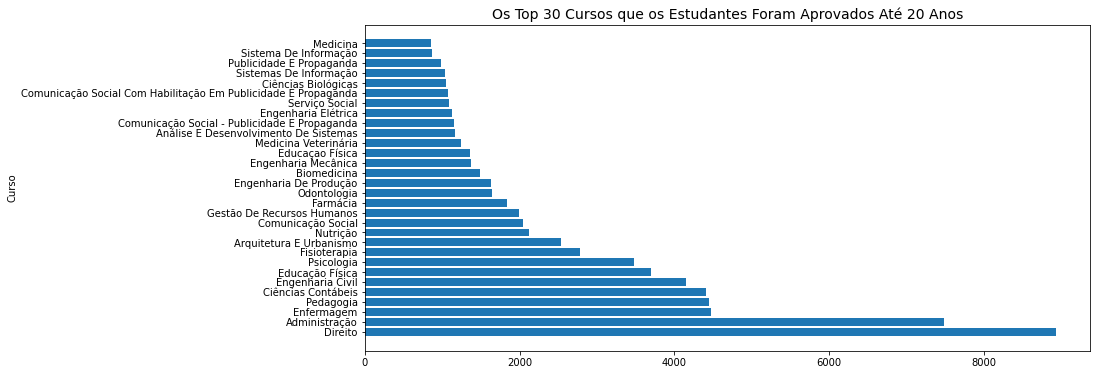

In [37]:
plt.figure(figsize=(13,6))
plt.title('Os Top 30 Cursos que os Estudantes Foram Aprovados Até 20 Anos',fontsize=14)
plt.barh(prouni_20['NOME_CURSO_BOLSA'].value_counts().index[0:30],
         prouni_20['NOME_CURSO_BOLSA'].value_counts()[0:30])
plt.ylabel('Curso');

In [ ]:
prouni_50 = prouni[(prouni['IDADE']>20) & (prouni['IDADE']<=50)]

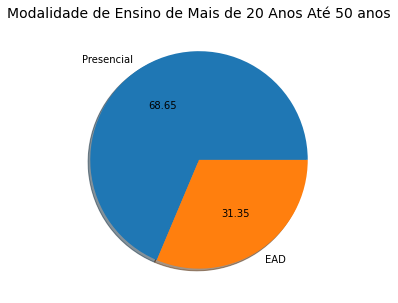

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Modalidade de Ensino de Mais de 20 Anos Até 50 anos',fontsize=14)
plt.pie(prouni_50['MODALIDADE_ENSINO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_50['MODALIDADE_ENSINO_BOLSA'].value_counts().index);

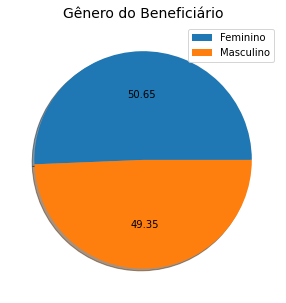

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Gênero do Beneficiário',fontsize=14)
plt.pie(prouni_50['SEXO_BENEFICIARIO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f')
plt.legend(['Feminino','Masculino']);

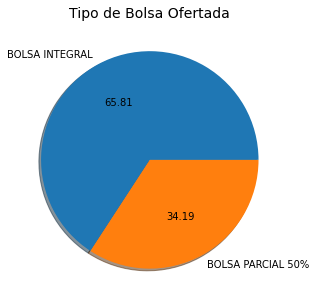

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Tipo de Bolsa Ofertada',fontsize=14)
plt.pie(prouni_50['TIPO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_50['TIPO_BOLSA'].value_counts().index);

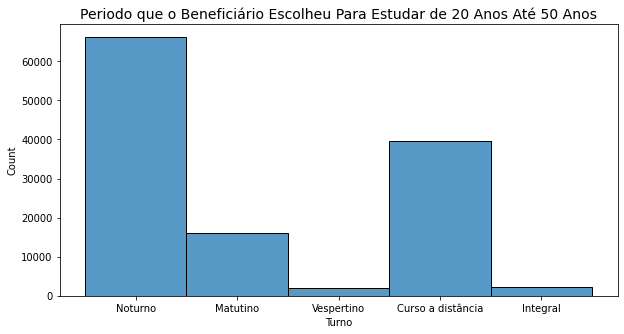

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Periodo que o Beneficiário Escolheu Para Estudar de 20 Anos Até 50 Anos',fontsize=14)
sns.histplot(x='NOME_TURNO_CURSO_BOLSA',data=prouni_50)
plt.xlabel('Turno');

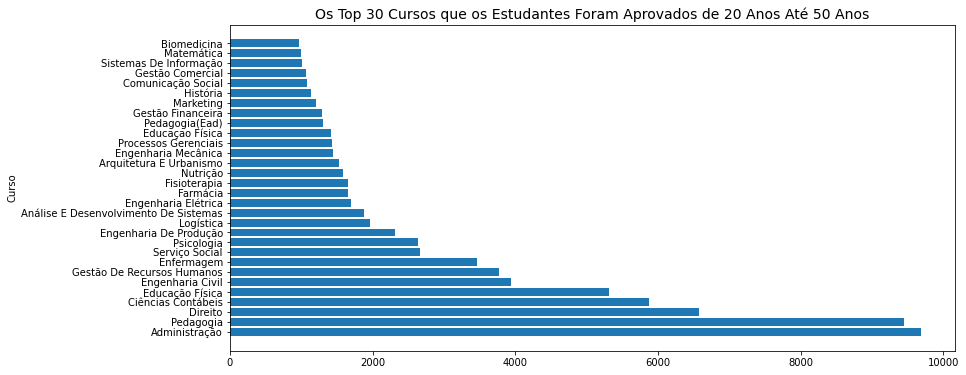

In [38]:
plt.figure(figsize=(13,6))
plt.title('Os Top 30 Cursos que os Estudantes Foram Aprovados de 20 Anos Até 50 Anos',fontsize=14)
plt.barh(prouni_50['NOME_CURSO_BOLSA'].value_counts().index[0:30],
         prouni_50['NOME_CURSO_BOLSA'].value_counts()[0:30])
plt.ylabel('Curso');

In [ ]:
prouni_m_50 = prouni[prouni['IDADE']>50]

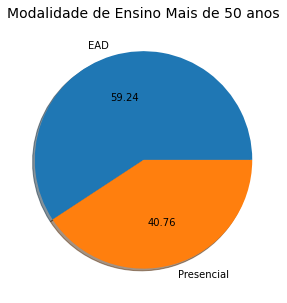

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Modalidade de Ensino Mais de 50 anos',fontsize=14)
plt.pie(prouni_m_50['MODALIDADE_ENSINO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_m_50['MODALIDADE_ENSINO_BOLSA'].value_counts().index);

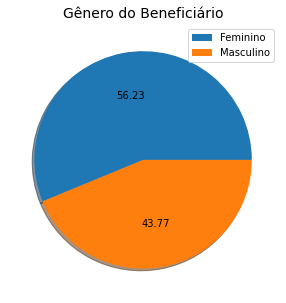

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Gênero do Beneficiário',fontsize=14)
plt.pie(prouni_m_50['SEXO_BENEFICIARIO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f')
plt.legend(['Feminino','Masculino']);

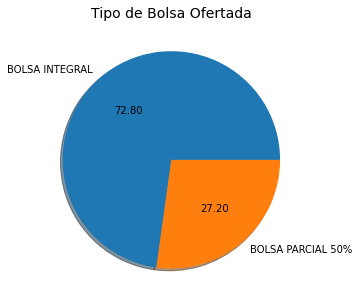

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Tipo de Bolsa Ofertada',fontsize=14)
plt.pie(prouni_m_50['TIPO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_m_50['TIPO_BOLSA'].value_counts().index);

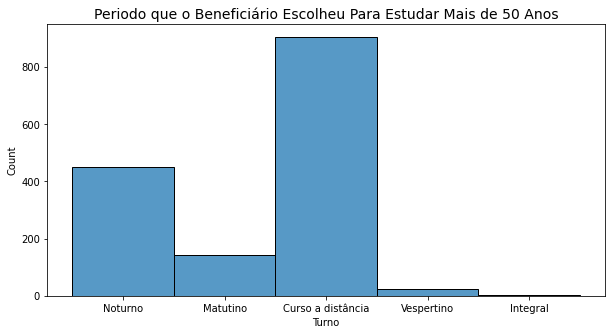

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Periodo que o Beneficiário Escolheu Para Estudar Mais de 50 Anos',fontsize=14)
sns.histplot(x='NOME_TURNO_CURSO_BOLSA',data=prouni_m_50)
plt.xlabel('Turno');

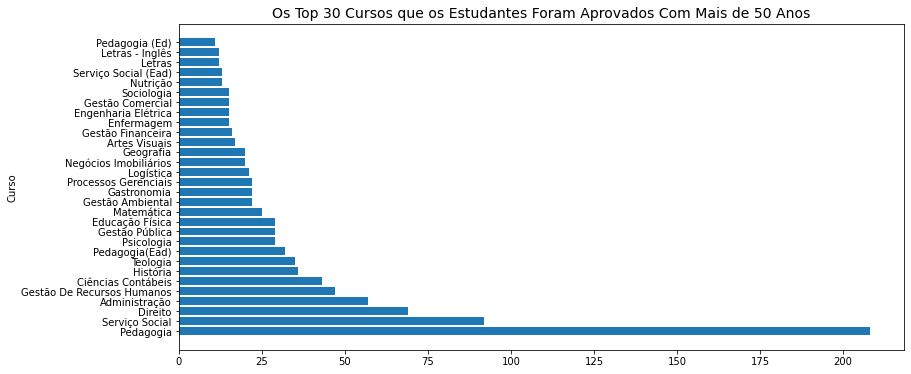

In [39]:
plt.figure(figsize=(13,6))
plt.title('Os Top 30 Cursos que os Estudantes Foram Aprovados Com Mais de 50 Anos',fontsize=14)
plt.barh(prouni_m_50['NOME_CURSO_BOLSA'].value_counts().index[0:30],
         prouni_m_50['NOME_CURSO_BOLSA'].value_counts()[0:30])
plt.ylabel('Curso');

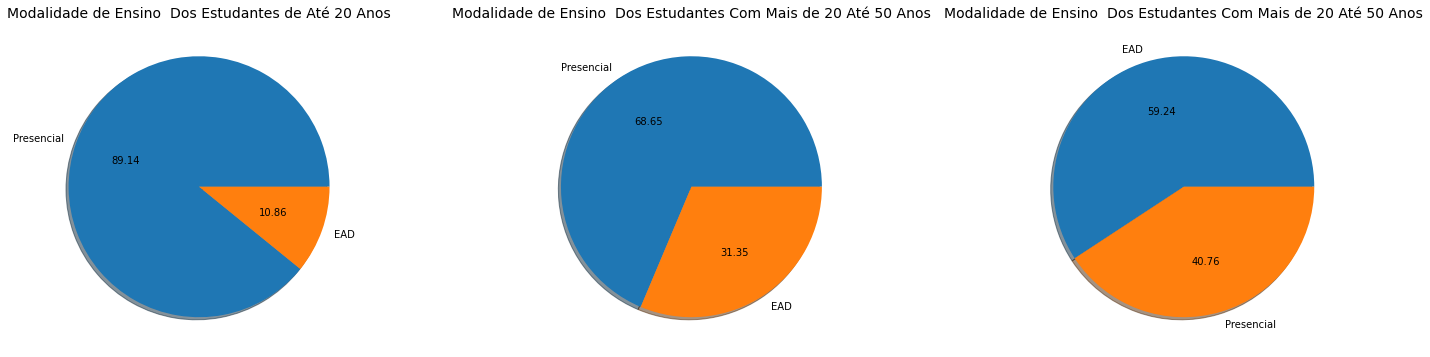

In [ ]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt.title('Modalidade de Ensino  Dos Estudantes de Até 20 Anos',fontsize=14)
plt.pie(prouni_20['MODALIDADE_ENSINO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_20['MODALIDADE_ENSINO_BOLSA'].value_counts().index)

plt.subplot(1,3,2)
plt.title('Modalidade de Ensino  Dos Estudantes Com Mais de 20 Até 50 Anos',fontsize=14)
plt.pie(prouni_50['MODALIDADE_ENSINO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_20['MODALIDADE_ENSINO_BOLSA'].value_counts().index)

plt.subplot(1,3,3)
plt.title('Modalidade de Ensino  Dos Estudantes Com Mais de 20 Até 50 Anos',fontsize=14)
plt.pie(prouni_m_50['MODALIDADE_ENSINO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_m_50['MODALIDADE_ENSINO_BOLSA'].value_counts().index);

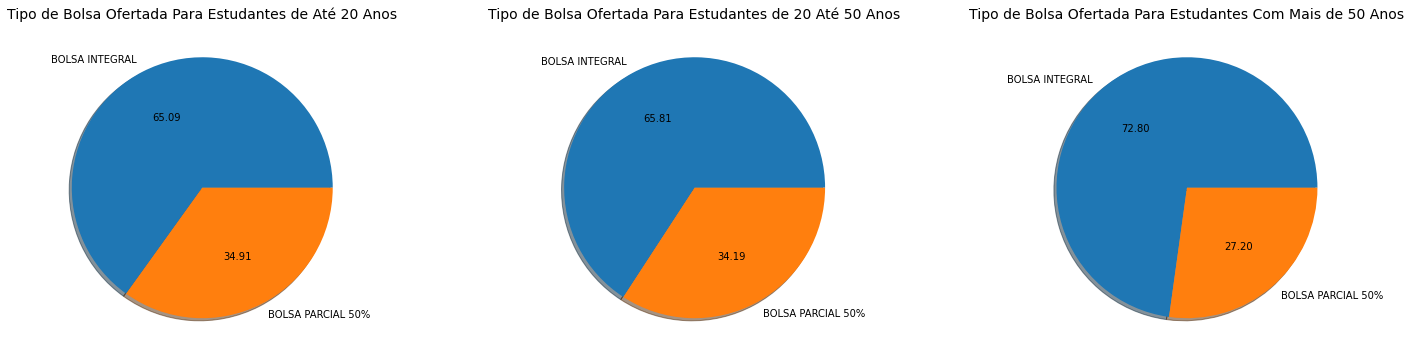

In [36]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt.title('Tipo de Bolsa Ofertada Para Estudantes de Até 20 Anos',fontsize=14)
plt.pie(prouni_20['TIPO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_20['TIPO_BOLSA'].value_counts().index)

plt.subplot(1,3,2)
plt.title('Tipo de Bolsa Ofertada Para Estudantes de 20 Até 50 Anos',fontsize=14)
plt.pie(prouni_50['TIPO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_50['TIPO_BOLSA'].value_counts().index)

plt.subplot(1,3,3)
plt.title('Tipo de Bolsa Ofertada Para Estudantes Com Mais de 50 Anos',fontsize=14)
plt.pie(prouni_m_50['TIPO_BOLSA'].value_counts(),shadow=True,
        autopct='%1.2f',labels=prouni_m_50['TIPO_BOLSA'].value_counts().index);